In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

C:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [6]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [7]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

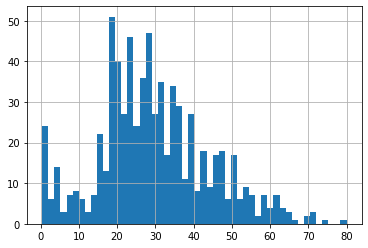

In [9]:
df['age'].hist(bins=50);

In [10]:
subset = df[['pclass', 'sex', 'age', 'survived']].copy()
subset.dropna(inplace=True)

In [11]:
X = subset[['pclass', 'sex', 'age']].copy()

In [12]:
from sklearn import preprocessing
# lb = preprocessing.LabelBinarizer()
le = preprocessing.LabelEncoder()

In [13]:
X['sex'] = le.fit_transform(subset['sex'])

In [14]:
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [15]:
X.shape

(714, 3)

In [16]:
X.describe()

,pclass,sex,age
count,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118
std,0.838250,0.481921,14.526497
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.125000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  714 non-null    int64  
 1   sex     714 non-null    int32  
 2   age     714 non-null    float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 19.5 KB


In [18]:
y = subset['survived'].copy()

In [19]:
y.value_counts()

0    424
1    290
Name: survived, dtype: int64

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

In [24]:
clf = DecisionTreeClassifier(random_state=42)

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("\n********************************\n")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9038

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92       302
           1       0.96      0.79      0.87       197

    accuracy                           0.90       499
   macro avg       0.92      0.88      0.90       499
weighted avg       0.91      0.90      0.90       499


Confusion Matrix: 
 [[296   6]
 [ 42 155]]

ROC AUC: 0.8835

Average Accuracy: 	 0.8056
Accuracy SD: 		 0.0499

********************************

Test Result:

accuracy score: 0.7953

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       122
           1       0.80      0.71      0.75        93

    accuracy                           0.80       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.80      0.80      0.79       215


Confusion Matrix: 
 [[105  17]
 [ 27  66]]

ROC AUC: 0.7852



In [27]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [28]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [29]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("\n********************************\n")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9038

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92       302
           1       0.96      0.79      0.87       197

    accuracy                           0.90       499
   macro avg       0.92      0.88      0.90       499
weighted avg       0.91      0.90      0.90       499


Confusion Matrix: 
 [[296   6]
 [ 42 155]]

ROC AUC: 0.8835

Average Accuracy: 	 0.8056
Accuracy SD: 		 0.0499

********************************

Test Result:

accuracy score: 0.7953

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       122
           1       0.80      0.71      0.75        93

    accuracy                           0.80       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.80      0.80      0.79       215


Confusion Matrix: 
 [[105  17]
 [ 27  66]]

ROC AUC: 0.7852



In [30]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

In [31]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=1000, n_jobs=-1, oob_score=True,
                  random_state=42)

In [32]:
bag_clf.oob_score_

0.8096192384769539

In [33]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("\n********************************\n")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9038

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92       302
           1       0.96      0.79      0.87       197

    accuracy                           0.90       499
   macro avg       0.92      0.88      0.90       499
weighted avg       0.91      0.90      0.90       499


Confusion Matrix: 
 [[296   6]
 [ 42 155]]

ROC AUC: 0.8835

Average Accuracy: 	 0.8056
Accuracy SD: 		 0.0499

********************************

Test Result:

accuracy score: 0.7953

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       122
           1       0.80      0.71      0.75        93

    accuracy                           0.80       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.80      0.80      0.79       215


Confusion Matrix: 
 [[105  17]
 [ 27  66]]

ROC AUC: 0.7852

